In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from PIL import Image, ImageEnhance, ImageStat

%load_ext nb_black
matplotlib.rcParams["font.sans-serif"] = "Times New Roman"

<IPython.core.display.Javascript object>

In [2]:
hazy_img_seattle = cv2.imread("img/Screen Shot 2020-08-19 at 12.12.40 PM.png")

<IPython.core.display.Javascript object>

## Image Histogram

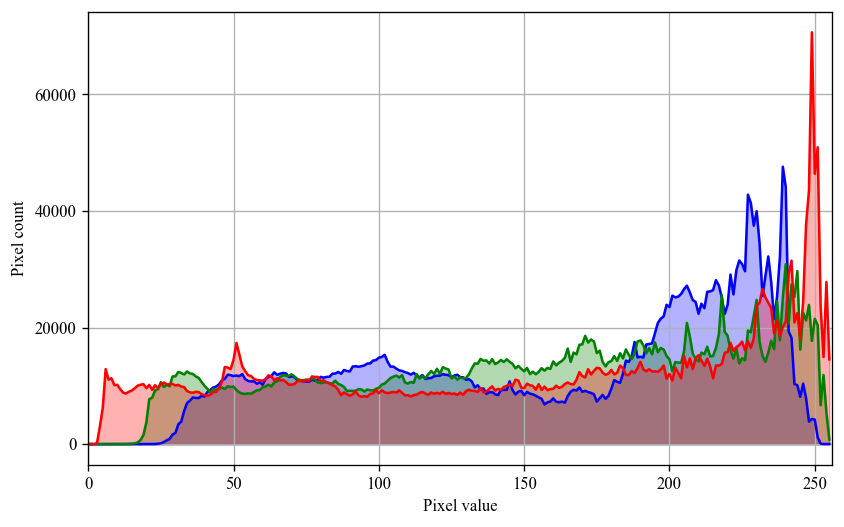

<IPython.core.display.Javascript object>

In [3]:
color = ("b", "g", "r")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), dpi=120)
plt.grid()
for i, col in enumerate(color):
    histr = cv2.calcHist([hazy_img_seattle], [i], None, [256], [0, 256])
    sns.lineplot(
        data=pd.DataFrame(histr).reset_index(),
        x="index",
        y=0,
        ax=ax,
        color=col,
    )
    l = ax.lines[i]
    x = l.get_xydata()[:, 0]
    y = l.get_xydata()[:, 1]
    ax.fill_between(x, y, color=col, alpha=0.3)
ax.set_xlim([0, 256])
ax.set_xlabel("Pixel value")
ax.set_ylabel("Pixel count")
plt.savefig("img/rgb_hazy_img_seattle.png")
plt.rcParams.update({"font.size": 18})
plt.show()

## Difference between brightness and Saturation

In [4]:
img = Image.open("img/Screen Shot 2020-08-19 at 12.12.40 PM.png")

<IPython.core.display.Javascript object>

In [5]:
n = 220
x, y = img.size[0] // n, img.size[1] // n
brightness_saturation_difference = np.zeros((x, y))

<IPython.core.display.Javascript object>

In [6]:
grayscale_img = img.convert("L")
img_hsv = cv2.cvtColor(hazy_img_seattle, cv2.COLOR_BGR2HSV)

<IPython.core.display.Javascript object>

In [7]:
for i in range(0, img.size[0], n):
    for j in range(0, img.size[1], n):
        saturation = img_hsv[j, i, 1]
        brightness = grayscale_img.getpixel((i, j)) / 255
        if j // n < y and i // n < x:
            brightness_saturation_difference[(i // n, j // n)] = brightness - saturation

<IPython.core.display.Javascript object>

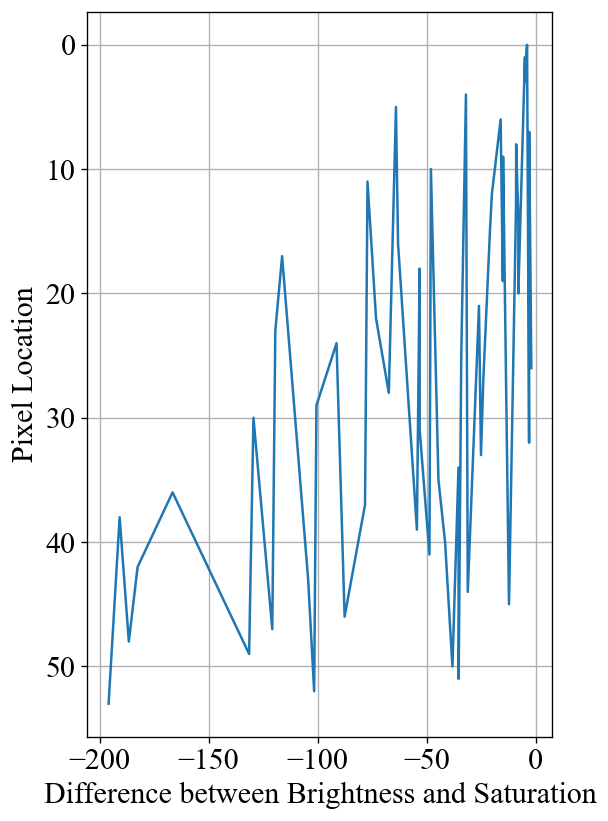

<IPython.core.display.Javascript object>

In [8]:
color = ("b", "g", "r")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 8), dpi=120)
plt.grid()
sns.lineplot(
    data=pd.DataFrame(np.ravel(brightness_saturation_difference)).reset_index(),
    x=0,
    y="index",
)
plt.gca().invert_yaxis()
ax.set_xlabel("Difference between Brightness and Saturation")
ax.set_ylabel("Pixel Location")
plt.savefig("img/diff_bright_sat_hazy_img_seattle.png")
plt.rcParams.update({"font.size": 18})
plt.show()